# NLP with BERT Transformers

Though word embeddings and recurrent neural networks such as LSTM have proven to be extremely efficient for various natural language processing tasks such as text classification, there are a few problems with LSTM and CNN based text classification systems.  

With LSTM, data can only be read in a sequential manner in one direction. Though bidirectional LSTM solves this problem by reading data in both forward and backward directions, the text is still processed sequentially instead of being processed parallelly. This is where transformer models come into play. Transformer models process the whole text document in parallel, relying on attention mechanism.  

In the attention mechanism, instead of processing text sequentially, the text is processed in parallel, which allows the attention systems to assign weightage to important parts of the text in a parallel manner.  

Several transformer models have been developed until now. However, in this chapter, you will be studying BERT, which stands for (Bidirectional Encoder Representations from Transformers) developed by Google.  

**Why use Transformers (BERT)**  
Why should we use BERT over traditional word embeddings and LSTM based neural networks?  

BERT or Transformer models are able to generate word representations that capture local context. For instance, with word embeddings, the representation of the word “apple” will be the same even if we talk about “apple I phone” or apple as a fruit. With BERT, a different word representation will be generated. In addition, BERT models divide words into stems and leaf segments.  
- For instance, the word “Judgmental” is treated as two separate tokens “Judgement” and “al,” which makes word representation more flexible.

## BERT Text Classification
The BERT model is used for generating text representations, which you can then use with LSTM or CNN networks to build text classification or any other type of model. However, BERT also contains Sequence Classification models, which can be used to classify text.  

The steps involved in text classification using BERT sequence models are as follows:
1. Generate BERT tokens (use the BERT Tokenizer).
2. Convert data into the format that can be used by a BERT model and perform word embeddings using BERT.
3. Create a sequence classification model for BERT.
4. Train the sequence classification model.
5. Evaluate the model on the test set.  

For this exercise you can download the IMDB sentiment dataset from [kaggle](https://www.kaggle.com/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews)

### BERT Tokenization and Embeddings

In [ ]:
from transformers import BertTokenizer, AutoTokenizer

In [ ]:
model = 'bert-base-uncased'

In [ ]:
bert_tokenizer= AutoTokenizer.from_pretrained(model, do_lower_case=True)
max_sent_length = 25

### Create BERT input

In [ ]:
sample_sent= 'queen'

# add start and stop tokens
sample_sent_plus_special_tokens = '[CLS]' + sample_sent + '[SEP]'

tokenized_sent = bert_tokenizer.tokenize(sample_sent_plus_special_tokens)
print('tokenized_sent',tokenized_sent)

tokenized_sent ['[CLS]', 'queen', '[SEP]']


In [ ]:
input_ids = bert_tokenizer.convert_tokens_to_ids(tokenized_sent)
print(input_ids)

[101, 3035, 102]


In [ ]:
sample_sent= 'Hello, are you judgemental. No I am incremental.'

# add start and stop tokens
sample_sent_plus_special_tokens = '[CLS]' + sample_sent + '[SEP]'

tokenized_sent = bert_tokenizer.tokenize(sample_sent_plus_special_tokens)
print('tokenized_sent',tokenized_sent)

tokenized_sent ['[CLS]', 'hello', ',', 'are', 'you', 'judgement', '##al', '.', 'no', 'i', 'am', 'inc', '##rem', '##ental', '.', '[SEP]']


- “Judgmental” is treated as two separate tokens “Judgement” and “al”
- “incremental” is treated as three separate tokens “inc” and “rem” and "ental"

Convert the text tokens into the integer format using the **_convert_tokens_to_ids()_** method of the BERT tokenizer

Apply padding to the input sentences so that all the sentences have the same length.  
Since the maximum sentence length is set to 25 and the input sentence contains 16 tokens, the pad length will be 9

In [ ]:
input_ids = bert_tokenizer.convert_tokens_to_ids(tokenized_sent)
print(input_ids)

[101, 7592, 1010, 2024, 2017, 16646, 2389, 1012, 2053, 1045, 2572, 4297, 28578, 21050, 1012, 102]


In [ ]:
pad_length = max_sent_length - len(input_ids)
print(pad_length)

9


In [ ]:
input_ids = input_ids + ([0] * pad_length)
print(input_ids)

[101, 7592, 1010, 2024, 2017, 16646, 2389, 1012, 2053, 1045, 2572, 4297, 28578, 21050, 1012, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0]


Attention masks are a list of 0s and 1s where a 1 is added to the positions that contained original objects, while 0 is added to the padding indexes.

In [ ]:
att_mask = [1] * len(input_ids)
att_mask = att_mask + ([0] * pad_length)
print(att_mask)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]


Token type ids are used to separate input sentence from an output sentence in case there are two sentences in the input.  
Zeros are added for the index of the first sentence, while a 1 is added for the indexes of the other sentence.  
Since we have only a single sentence, we will only create a list of all 0s for token type ids

In [ ]:
token_type_ids = [0] * max_sent_length

Finally the code below create a complete input for BERT models, a dictionary of token ids, token type ids, and attention mask is created

In [ ]:
input_for_bert = {
    "token_ids": input_ids, 
    "token_type_ids": token_type_ids, 
    "attention_mask": att_mask
}
print(input_for_bert)

{'token_ids': [101, 7592, 1010, 2024, 2017, 16646, 2389, 1012, 2053, 1045, 2572, 4297, 28578, 21050, 1012, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]}


### Automatic BERT input

The _**encode_plus**_ function of the BertTokenizer object can  be used to create the BERT input automatically

In [ ]:
input_for_bert = bert_tokenizer.encode_plus(
    sample_sent, 
    add_special_tokens = True, 
    max_length = max_sent_length,
    truncation=True,
    pad_to_max_length = True,
    return_attention_mask = True
)

print("encoded", input_for_bert)

encoded {'input_ids': [101, 7592, 1010, 2024, 2017, 16646, 2389, 1012, 2053, 1045, 2572, 4297, 28578, 21050, 1012, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]}


/Users/ndah/opt/miniconda3/envs/nlp/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:2251: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


### Classification  
Training is computationally intensive good to use GPU

In [2]:
# !pip install tensorflow_hub
# !pip install tensorflow_datasets
# !pip install transformers

In [2]:
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_datasets as tfds

import matplotlib.pyplot as plt

In [3]:
print("Version:", tf.__version__)
print("Eager mode: ", tf.executing_eagerly())
print("Hub version: ", hub.__version__)
print("GPU is", "available" if tf.test.is_gpu_available() else "NOT AVAILABLE")

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


Version: 2.12.0
Eager mode:  True
Hub version:  0.13.0
GPU is NOT AVAILABLE


In [4]:
import pandas as pd
import numpy as np 
import re
import nltk
from nltk.corpus import stopwords

The dataset can be downloaded from the 

In [1]:
from google.colab import files
uploades = files.upload()

Saving IMDB_Dataset.csv to IMDB_Dataset.csv


In [5]:
imdb_data = pd.read_csv(r"IMDB_Dataset.csv")
imdb_data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


#### Clean dataset

In [6]:
TAG_RE = re.compile(r'<[^>]+>')
def remove_tags(document):
    return TAG_RE.sub('', document)


def clean_text(doc):
    document = remove_tags(doc)
    document = re.sub('[^a-zA-Z]', ' ', document)
    document = re.sub(r"\s+[a-zA-Z]\s+", ' ', document)
    document = re.sub(r'\s+', ' ', document)
    
    return document

In [7]:
imdb_data["review_clean"]=imdb_data["review"].apply(clean_text)

In [8]:
imdb_data['sentiment'] = imdb_data['sentiment'].map({'positive': 1, 'negative': 0})
imdb_data.head()

,review,sentiment,review_clean
0,One of the other reviewers has mentioned that ...,1,One of the other reviewers has mentioned that ...
1,A wonderful little production. <br /><br />The...,1,A wonderful little production The filming tech...
2,I thought this was a wonderful way to spend ti...,1,I thought this was wonderful way to spend time...
3,Basically there's a family where a little boy ...,0,Basically there a family where little boy Jake...
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,Petter Mattei Love in the Time of Money is vis...


In [ ]:
import torch

In [105]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from transformers import TFBertForSequenceClassification, BertTokenizer
from tqdm import tqdm

In [53]:
X = imdb_data["review_clean"].values
y = imdb_data['sentiment'].values

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

print("Shape of training data: {0},\nShape of test data: {1}".format(X_train.shape, X_test.shape))

Shape of training data: (40000,),
Shape of test data: (10000,)


#### Create an object of the BertTokenizer class

In [14]:
bert_tokenizer = BertTokenizer.from_pretrained("bert-base-cased")

In [15]:
def lonest_sentence(reviews):
    max_length = 0
    for review in reviews:
        if len(review) > max_length:
            max_length = len(review)
            
    return max_length

In [16]:
pad_token=0
pad_token_segment_id=0

max_length = 500
max_length = lonest_sentence(X_train)

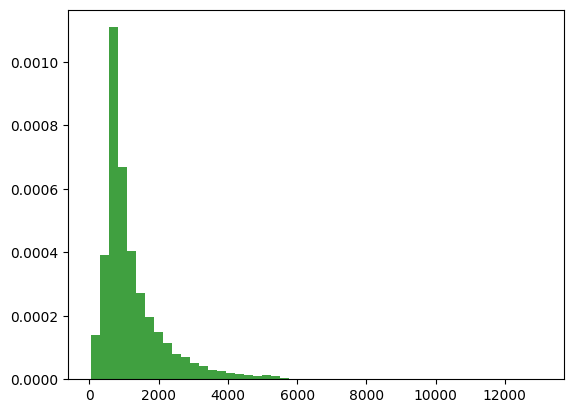

In [17]:
review_lens = imdb_data['review_clean'].apply(lambda x: len(x))
n, bins, patches = plt.hist(review_lens, 50, density=True, facecolor='g', alpha=0.75)

In [18]:
max_length = 500

In [102]:
def convert_to_tensors(input_ids, attention_masks,token_type_ids, labels):
    return {"input_ids": input_ids, 
            "attention_mask": attention_masks,
            "token_type_ids": token_type_ids}, labels 

def text_to_bert_input(reviews, labels):
    
    input_ids,attention_masks,token_type_ids=[],[],[]
    for review in tqdm(reviews):
        bert_inputs = bert_tokenizer.encode_plus(
            review,
            add_special_tokens=True,
            max_length=max_length,
            truncation=True
        )
    
        inputs, token_type = bert_inputs["input_ids"], bert_inputs["token_type_ids"]
        mask = [1] * len(inputs)
        padding_length = max_length - len(inputs)
        
        inputs = inputs + ([pad_token] * padding_length)
        mask = mask + ([0] * padding_length)
        token_type = token_type + ([pad_token_segment_id] * padding_length)
        
        input_ids.append(inputs)
        attention_masks.append(mask)
        token_type_ids.append(token_type)

    return tf.data.Dataset.from_tensor_slices((np.asarray(input_ids), 
                                              np.asarray(attention_masks), 
                                              np.asarray(token_type_ids),
                                              np.reshape(labels, (len(labels), -1)))).map(convert_to_tensors).batch(16)
    

Since we are using the TensorFlow backend to train BERT models, we need to convert the input data into tensors. The following script does that for both the training and test sets.

In [1]:
train_dataset = text_to_bert_input(X_train, y_train)
test_dataset = text_to_bert_input(X_test, y_test)

Next, you need to define the classification model. With Hugging Face’s transformers library, you can use the TFBertForSequenceClassificaion class to create a text classification model. The process of defining loss, optimizer, and evaluation metrics is similar to any other TensorFlow model. The following script creates a BERT text classification model and displays the model summary in the output.

In [106]:
model = TFBertForSequenceClassification.from_pretrained("bert-base-uncased")

optimizer=tf.keras.optimizers.Adam(learning_rate=3e-5, epsilon=1e-08)
loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

metric=tf.keras.metrics. SparseCategoricalAccuracy('accuracy')
model.compile(optimizer=optimizer,loss=loss,metrics=[metric])
model.summary()

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Model: "tf_bert_for_sequence_classification"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bert (TFBertMainLayer)      multiple                  109482240 
                                                                 
 dropout_37 (Dropout)        multiple                  0         
                                                                 
 classifier (Dense)          multiple                  1538      
                                                                 
Total params: 109,483,778
Trainable params: 109,483,778
Non-trainable params: 0
_________________________________________________________________


In [ ]:
batch_size = 16
history = model.fit(train_dataset.shuffle(25).batch(batch_size), 
                    validation_data=test_dataset.shuffle(25).batch(batch_size),
                    epochs=10
)

Epoch 1/10


In [ ]:
# list all data in history
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


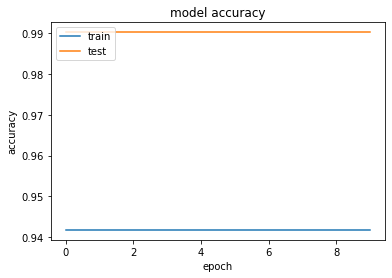

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()